In [1]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=100, shuffle=True, noise=0.05, random_state=None)

(2, 100)


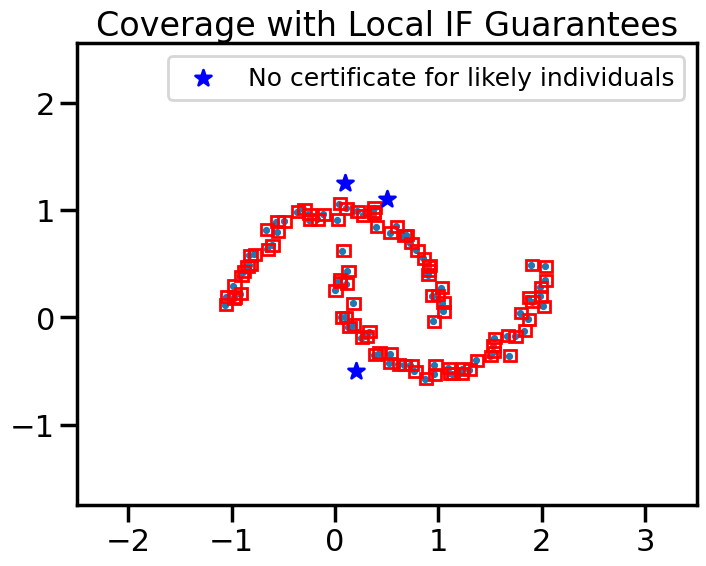

In [2]:
print(X.T.shape)

x1_coord = X[:,0]
x2_coord = X[:,1]
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import seaborn as sns
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

plt.scatter(x=x1_coord, y=x2_coord, s=10)

ax = plt.gca()
color = matplotlib.colors.colorConverter.to_rgba('white', alpha=.0)
eps = 0.1
for i in X:
    ax.add_patch(Rectangle((i[0]- (eps/2), i[1] - (eps/2)), eps*1.2, eps, edgecolor="red", facecolor=color))
    #break
    
plt.scatter(x=[0.1, 0.5, 0.2], y=[1.25, 1.1, -0.5], marker="*", color="b", label="No certificate for likely individuals")
plt.ylim((-1.75, 2.55))
plt.xlim((-2.5, 3.5))
plt.title("Coverage with Local IF Guarantees")
plt.legend(fontsize=18)
plt.show()


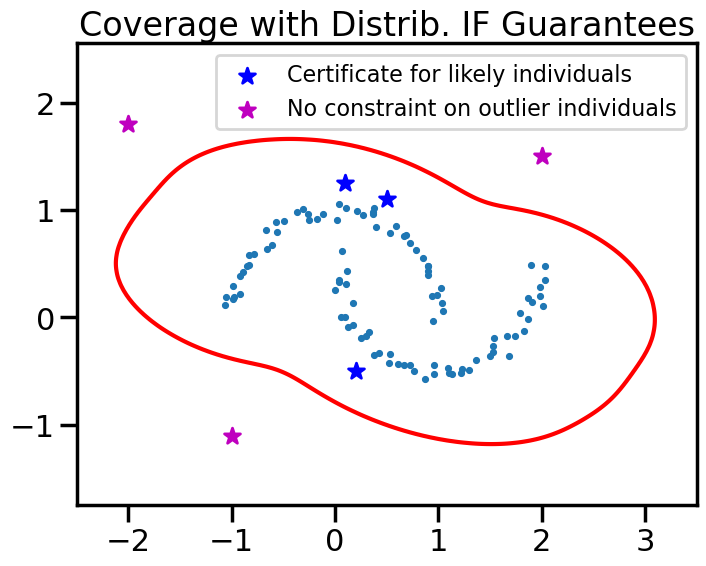

In [3]:
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

plt.scatter(x=x1_coord, y=x2_coord, s=10)
sns.kdeplot(x=x1_coord, y=x2_coord, thresh=0.003, levels=1, color='r')
ax = plt.gca()
color = matplotlib.colors.colorConverter.to_rgba('white', alpha=.0)
eps = 0.1
plt.scatter(x=[0.1, 0.5, 0.2], y=[1.25, 1.1, -0.5], marker="*", color="b", label="Certificate for likely individuals")
plt.scatter(x=[-2.0, 2.0, -1.0], y=[1.8, 1.5, -1.1], marker="*", color="m", label="No constraint on outlier individuals")
plt.ylim((-1.75, 2.55))
plt.xlim((-2.5, 3.5))
plt.title("Coverage with Distrib. IF Guarantees")
plt.legend(fontsize=16)
plt.show()


In [4]:
from scipy.stats import gaussian_kde
import numpy as np
print(X.shape)
kde = gaussian_kde(np.transpose(X))
X_test_blue = np.transpose([[0.1, 1.25], [0.5, 1.1], [0.2, -0.5]])
X_test_purp = np.transpose([[-2.0, 1.8], [2.0, 1.5], [-1., -1.1]])
pdf_estimate_blue = kde.evaluate(X_test_blue)
pdf_estimate_purp = kde.evaluate(X_test_purp)
print(sum(pdf_estimate_blue))
print(sum(pdf_estimate_purp))

(100, 2)
0.332180641326706
4.8164009077024e-06


In [8]:
min_dist_sum = 0
for i in range(len(X_test_purp.T)):
    min_dist = 1000000
    for j in range(len(X)):
        dist = np.linalg.norm(X_test_purp.T[i] - X[j])
        if(dist < min_dist):
            min_dist = dist        
    min_dist_sum += min_dist
print(min_dist_sum/3)

min_dist_sum = 0
for i in range(len(X_test_blue.T)):
    min_dist = 1000000
    for j in range(len(X)):
        dist = np.linalg.norm(X_test_blue.T[i] - X[j])
        if(dist < min_dist):
            min_dist = dist   
    min_dist_sum += min_dist
print(min_dist_sum/3)

1.2975515373244189
0.19531799944659514


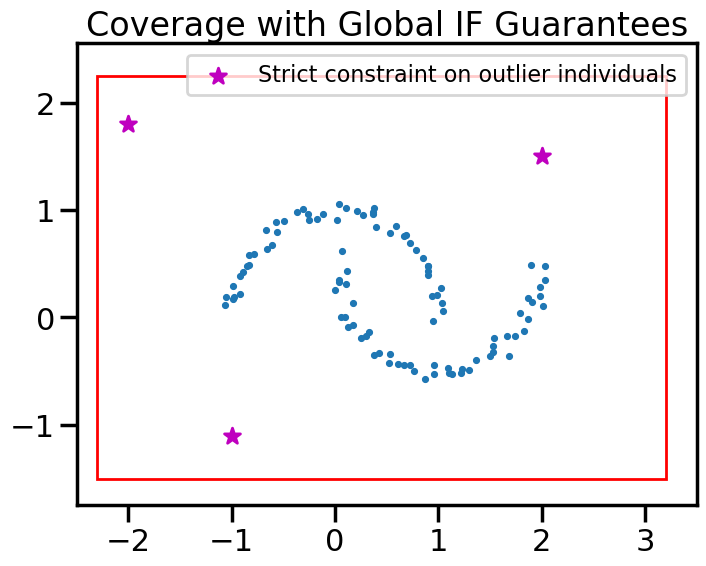

In [6]:
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

plt.scatter(x=x1_coord, y=x2_coord, s=10) #, label="Empirical Distribution")
ax = plt.gca()
color = matplotlib.colors.colorConverter.to_rgba('white', alpha=.0)
ax.add_patch(Rectangle((-2.3, -1.5), 5.5, 3.75, edgecolor="red", facecolor=color))
plt.ylim((-1.75, 2.55))
plt.xlim((-2.5, 3.5))
plt.scatter(x=[-2.0, 2.0, -1.0], y=[1.8, 1.5, -1.1], marker="*", color="m", label="Strict constraint on outlier individuals")
plt.title("Coverage with Global IF Guarantees")
plt.legend(fontsize=16)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#          fancybox=True, shadow=True, ncol=5)
plt.show()
